## INTENTO 16

In [939]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import matplotlib as plt
import shap

In [940]:
df4 = pd.read_csv('../df_cleaned.csv')

In [941]:
df4.drop(columns='Unnamed: 0',inplace=True)

In [942]:
df4.drop('index', axis=1, inplace=True)

In [943]:
df4.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51,1,1,125.0,213.0,0.0,2.0,125.0,1.0,1.4,1.0,1.0,3.0,0.0
1,54,1,3,120.0,237.0,0.0,0.0,150.0,1.0,1.5,NaN,NaN,7.0,2.0
2,63,1,4,140.0,0.0,NaN,2.0,149.0,0.0,2.0,1.0,NaN,NaN,2.0
3,52,0,2,140.0,NaN,0.0,0.0,140.0,0.0,0.0,NaN,NaN,NaN,0.0
4,55,1,4,140.0,217.0,0.0,0.0,111.0,1.0,5.6,3.0,0.0,7.0,3.0


In [944]:
# Suponiendo que 'df' es tu DataFrame y 'df' es tu DataFrame final
# Convertir '<NA>' a NaN
df4.replace('<NA>', np.nan, inplace=True)

# Obtener columnas numéricas y categóricas
numeric_cols4 = ['age', 'oldpeak', 'thalach']
categorical_cols4 = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'label']

# Imputación para variables numéricas (usando la media)
numeric_imputer3 = SimpleImputer(strategy='mean')
df4[numeric_cols4] = numeric_imputer3.fit_transform(df4[numeric_cols4])

# Imputación para variables categóricas (usando la moda)
categorical_imputer3 = SimpleImputer(strategy='most_frequent')
df4[categorical_cols4] = categorical_imputer3.fit_transform(df4[categorical_cols4])

# Verificar que ya no hay valores faltantes
print(df4.isnull().sum())

# El DataFrame 'df' ahora contiene los valores imputados


age           0
sex           0
cp            0
trestbps     59
chol         30
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal        483
label         0
dtype: int64


In [945]:
# Función para categorizar los valores de chol
def categorizar_chol(valor):
    if valor == 0 or pd.isnull(valor):  
        return 0
    elif valor < 200:
        return 1
    elif 200 <= valor <= 239:
        return 2
    else:  # valor >= 240
        return 3

# Aplicar la función al DataFrame
df4['chol'] = df4['chol'].apply(categorizar_chol)

# Mostrar los primeros registros para verificar el resultado
print(df4['chol'].head())


0    2
1    2
2    0
3    0
4    2
Name: chol, dtype: int64


In [946]:
def categorizar_trestbps(valor):
    if pd.isnull(valor):
        return 0
    elif valor < 120:
        return 1
    elif 120 <= valor <= 129:
        return 2
    else:  # valor >= 130
        return 3


df4['trestbps'] = df4['trestbps'].apply(categorizar_trestbps)

# Mostrar los primeros registros para verificar el resultado
print(df4['trestbps'].head())


0    2
1    2
2    3
3    3
4    3
Name: trestbps, dtype: int64


In [947]:
def sust_thal(valor):
    if pd.isnull(valor):
        return 0
    else:
        return valor

df4['thal'] = df4['thal'].apply(sust_thal)
print(df4['thal'].head())

0    3.0
1    7.0
2    0.0
3    0.0
4    7.0
Name: thal, dtype: float64


In [948]:
df4.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
label       0
dtype: int64

In [949]:
from sklearn.preprocessing import MinMaxScaler

# Crear un objeto MinMaxScaler
scaler3 = MinMaxScaler()

# Lista de columnas a estandarizar
columns_to_scale3 = ['age', 'oldpeak', 'thalach']

# Ajustar el escalador solo a las columnas especificadas y transformarlas
df4[columns_to_scale3] = scaler3.fit_transform(df4[columns_to_scale3])


In [950]:
from sklearn.preprocessing import OrdinalEncoder

# Inicializar el codificador ordinal
ordinal_encoder = OrdinalEncoder()

# Variables para codificación ordinal
ordinal_vars = ["slope", "ca", "thal", "restecg"]

# Aplicar codificación ordinal
df4[ordinal_vars] = ordinal_encoder.fit_transform(df4[ordinal_vars])

df4.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,0.469388,1.0,1.0,2,2,0.0,2.0,0.457746,1.0,0.454545,0.0,1.0,1.0,0.0
1,0.530612,1.0,3.0,2,2,0.0,0.0,0.633803,1.0,0.465909,1.0,0.0,3.0,2.0
2,0.714286,1.0,4.0,3,0,0.0,2.0,0.626761,0.0,0.522727,0.0,0.0,0.0,2.0
3,0.489796,0.0,2.0,3,0,0.0,0.0,0.563380,0.0,0.295455,1.0,0.0,0.0,0.0
4,0.551020,1.0,4.0,3,2,0.0,0.0,0.359155,1.0,0.931818,2.0,0.0,3.0,3.0


In [951]:
# Aplicar codificación de conteo
for var in ["chol","trestbps", "cp"]:
    df4[var + '_count'] = df4[var].map(df4[var].value_counts())

df4.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label,chol_count,trestbps_count,cp_count
0,0.469388,1.0,1.0,2,2,0.0,2.0,0.457746,1.0,0.454545,0.0,1.0,1.0,0.0,230,211,44
1,0.530612,1.0,3.0,2,2,0.0,0.0,0.633803,1.0,0.465909,1.0,0.0,3.0,2.0,230,211,204
2,0.714286,1.0,4.0,3,0,0.0,2.0,0.626761,0.0,0.522727,0.0,0.0,0.0,2.0,201,485,495
3,0.489796,0.0,2.0,3,0,0.0,0.0,0.563380,0.0,0.295455,1.0,0.0,0.0,0.0,201,485,173
4,0.551020,1.0,4.0,3,2,0.0,0.0,0.359155,1.0,0.931818,2.0,0.0,3.0,3.0,230,485,495


In [952]:
df4

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label,chol_count,trestbps_count,cp_count
0,0.469388,1.0,1.0,2,2,0.0,2.0,0.457746,1.0,0.454545,0.0,1.0,1.0,0.0,230,211,44
1,0.530612,1.0,3.0,2,2,0.0,0.0,0.633803,1.0,0.465909,1.0,0.0,3.0,2.0,230,211,204
2,0.714286,1.0,4.0,3,0,0.0,2.0,0.626761,0.0,0.522727,0.0,0.0,0.0,2.0,201,485,495
3,0.489796,0.0,2.0,3,0,0.0,0.0,0.563380,0.0,0.295455,1.0,0.0,0.0,0.0,201,485,173
4,0.551020,1.0,4.0,3,2,0.0,0.0,0.359155,1.0,0.931818,2.0,0.0,3.0,3.0,230,485,495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,0.530612,1.0,4.0,3,1,0.0,0.0,0.577465,1.0,0.522727,1.0,0.0,0.0,0.0,128,485,495
912,0.551020,1.0,2.0,1,2,1.0,1.0,0.845070,0.0,0.394986,1.0,0.0,0.0,0.0,230,161,173
913,0.795918,1.0,3.0,3,2,0.0,2.0,0.633803,0.0,0.386364,1.0,0.0,3.0,0.0,230,485,204
914,0.632653,1.0,1.0,3,3,0.0,2.0,0.697183,0.0,0.318182,1.0,0.0,3.0,0.0,357,485,44


In [953]:
train_end4 = df4[0:732]
test_end4 = df4[(916-184):]

In [954]:
train_end4.isna().sum()

age               0
sex               0
cp                0
trestbps          0
chol              0
fbs               0
restecg           0
thalach           0
exang             0
oldpeak           0
slope             0
ca                0
thal              0
label             0
chol_count        0
trestbps_count    0
cp_count          0
dtype: int64

In [955]:
test_end4.isna().sum()

age               0
sex               0
cp                0
trestbps          0
chol              0
fbs               0
restecg           0
thalach           0
exang             0
oldpeak           0
slope             0
ca                0
thal              0
label             0
chol_count        0
trestbps_count    0
cp_count          0
dtype: int64

In [956]:
train_end4['label'].value_counts()

label
0.0    327
1.0    156
2.0    108
3.0    107
4.0     34
Name: count, dtype: int64

In [957]:
from sklearn.model_selection import train_test_split

X4 = train_end4.drop('label', axis=1)  # Todas las columnas excepto la columna objetivo
Y4 = train_end4['label']

# Dividimos el conjunto de entrenamiento en nuevo entrenamiento y validación (85% entrenamiento, 15% validación del conjunto de entrenamiento original)
X4_train, X4_val, Y4_train, Y4_val = train_test_split(X4, Y4, test_size=0.125, random_state=42)



In [983]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define los hiperparámetros que deseas ajustar
param_grid = {
    'depth': [8, 9, 10, 12],
    'learning_rate': [0.08, 0.09, 0.1],
    'iterations': [18, 20, 22],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}

# Inicializa el modelo CatBoost
cb_model = CatBoostClassifier(verbose=False, loss_function='MultiClass')

# Inicializa GridSearchCV
grid_search = GridSearchCV(estimator=cb_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Ajusta GridSearchCV en los datos de entrenamiento
grid_search.fit(X4_train, Y4_train)

# Obtén los mejores hiperparámetros
best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

# Entrena un nuevo modelo con los mejores hiperparámetros
best_cb_model = CatBoostClassifier(**best_params)
best_cb_model.fit(X4_train, Y4_train)

# Evalúa el modelo
predictions = best_cb_model.predict(X4_val)
accuracy = accuracy_score(Y4_val, predictions)
print(f"La precisión del modelo CatBoost en el conjunto de validación con los mejores hiperparámetros es: {accuracy}")


Mejores hiperparámetros: {'depth': 8, 'iterations': 20, 'l2_leaf_reg': 3, 'learning_rate': 0.09}
0:	learn: 1.5519686	total: 8.48ms	remaining: 161ms
1:	learn: 1.5140095	total: 14ms	remaining: 126ms
2:	learn: 1.4676368	total: 19.8ms	remaining: 112ms
3:	learn: 1.4216857	total: 23.6ms	remaining: 94.4ms
4:	learn: 1.3777040	total: 27.8ms	remaining: 83.3ms
5:	learn: 1.3461519	total: 31.6ms	remaining: 73.6ms
6:	learn: 1.3146595	total: 36.6ms	remaining: 67.9ms
7:	learn: 1.2845894	total: 40.5ms	remaining: 60.8ms
8:	learn: 1.2529082	total: 46.8ms	remaining: 57.2ms
9:	learn: 1.2268411	total: 51.2ms	remaining: 51.2ms
10:	learn: 1.2020574	total: 54.8ms	remaining: 44.8ms
11:	learn: 1.1788633	total: 59.1ms	remaining: 39.4ms
12:	learn: 1.1606228	total: 62.9ms	remaining: 33.9ms
13:	learn: 1.1429473	total: 67.3ms	remaining: 28.9ms
14:	learn: 1.1253363	total: 71ms	remaining: 23.7ms
15:	learn: 1.1072619	total: 75.2ms	remaining: 18.8ms
16:	learn: 1.0918710	total: 79.1ms	remaining: 14ms
17:	learn: 1.0806542	

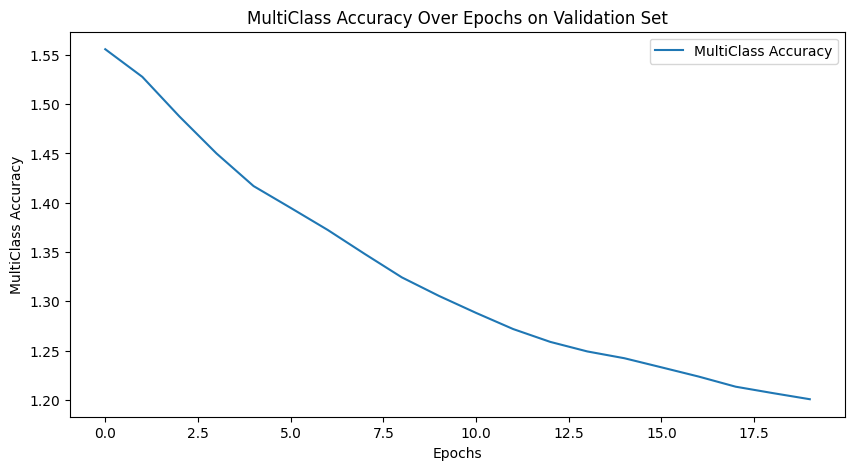

In [971]:
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt


# Definir los mejores hiperparámetros obtenidos de la búsqueda en cuadrícula
best_hyperparams = {'depth': 8, 'iterations': 20, 'l2_leaf_reg': 3, 'learning_rate': 0.09}

# Inicializar el modelo CatBoost con los mejores hiperparámetros
best_cb_model = CatBoostClassifier(**best_hyperparams,verbose=False)

# Entrenar el modelo con los datos de entrenamiento
best_cb_model.fit(X4_train, Y4_train, verbose=False)

# Entrenar el modelo con los datos de entrenamiento y evaluar en el conjunto de validación
# Asegúrate de habilitar el registro de la métrica de evaluación
best_cb_model.fit(X4_train, Y4_train, eval_set=(X4_val, Y4_val), verbose=False, plot=False)

# CatBoost permite acceder al registro de métricas de evaluación a través del objeto del modelo
# Acceder a las métricas de evaluación
eval_metrics = best_cb_model.get_evals_result()

# Ajustar el nombre de la clave para acceder a la métrica 'MultiClass' en el conjunto de validación
epochs = range(len(eval_metrics['validation']['MultiClass']))
accuracy = eval_metrics['validation']['MultiClass']

# Crear un gráfico de la métrica a lo largo de las iteraciones de entrenamiento
plt.figure(figsize=(10, 5))
plt.plot(epochs, accuracy, label='MultiClass Accuracy')
plt.xlabel('Epochs')
plt.ylabel('MultiClass Accuracy')
plt.title('MultiClass Accuracy Over Epochs on Validation Set')
plt.legend()
plt.show()


In [972]:
# Asumiendo que 'best_cb_model' es tu modelo entrenado

# Obtener la importancia de las características
feature_importances = best_cb_model.get_feature_importance()

# Obtener los nombres de las características
feature_names = X4_train.columns

# Crear un DataFrame para visualizar mejor la importancia de las características
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Ordenar el DataFrame por importancia de manera descendente
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Mostrar el DataFrame
print(importance_df)


           Feature  Importance
9          oldpeak   13.187258
12            thal    9.708211
2               cp    9.648647
15        cp_count    9.027990
0              age    8.531442
4             chol    8.351212
7          thalach    6.852978
6          restecg    6.647340
3         trestbps    6.167515
8            exang    5.322991
13      chol_count    5.062388
14  trestbps_count    4.238990
1              sex    2.828114
11              ca    1.534580
10           slope    1.459280
5              fbs    1.431062


In [973]:
from sklearn.metrics import accuracy_score

# Hacer predicciones en el conjunto de validación
Y4_val_pred = best_cb_model.predict(X4_val)

# Calcular la precisión
accuracy = accuracy_score(Y4_val, Y4_val_pred)

print(f"La precisión del modelo en el conjunto de validación es: {accuracy}")


La precisión del modelo en el conjunto de validación es: 0.5


In [974]:
# Excluyendo la columna 'label'
test_end4_sin_label = test_end4.drop('label', axis=1)

# Ahora puedes hacer predicciones con el conjunto de datos preparado
predicciones4 = best_cb_model.predict(test_end4_sin_label)

# Y también obtener las probabilidades de cada clase si lo necesitas
probabilidades4 = best_cb_model.predict_proba(test_end4_sin_label)



In [975]:
# Copiar el DataFrame 'test_end' a 'predicted_df'
predicted_df4 = test_end4.copy()

# Actualizar la columna 'label' con las predicciones
predicted_df4['label'] = predicciones4

# Mostrar las primeras filas del nuevo DataFrame para verificar
print(predicted_df4.head())



          age  sex   cp  trestbps  chol  fbs  restecg   thalach  exang  \
732  0.591837  1.0  4.0         3     1  0.0      2.0  0.415493    1.0   
733  0.489796  1.0  2.0         3     1  0.0      0.0  0.739437    0.0   
734  0.408163  1.0  2.0         1     0  0.0      0.0  0.281690    0.0   
735  0.693878  1.0  4.0         1     0  0.0      0.0  0.478873    1.0   
736  0.469388  1.0  3.0         1     1  0.0      0.0  0.443662    0.0   

      oldpeak  slope   ca  thal  label  chol_count  trestbps_count  cp_count  
732  0.636364    2.0  0.0   0.0    2.0         128             485       495  
733  0.295455    1.0  0.0   0.0    0.0         128             485       173  
734  0.295455    1.0  0.0   0.0    0.0         201             161       173  
735  0.579545    2.0  0.0   0.0    1.0         201             161       495  
736  0.363636    0.0  0.0   1.0    0.0         128             161       204  


In [976]:
predicted_df4['label'].value_counts()

label
0.0    105
1.0     45
2.0     20
3.0     14
Name: count, dtype: int64

In [977]:
# Restablecer el índice de predicted_df para que comience en 0 y luego sumar 1 para comenzar desde 1
predicted_df4.reset_index(drop=True, inplace=True)
predicted_df4['ID'] = predicted_df4.index 

# Seleccionar las columnas 'ID' y 'label' para el nuevo DataFrame df_randomf
df_randomf3 = predicted_df4[['ID', 'label']]

# Guardar df_randomf en un archivo CSV sin el índice de pandas
df_randomf3.to_csv('try66_data.csv', index=False)


In [980]:
df55best = pd.read_csv('try56best_data.csv')
dfactualtry = pd.read_csv('try66_data.csv')

In [981]:
difference = df55best['label'].compare(dfactualtry['label'])
difference = difference[difference['self']!= difference ['other']]

print(difference)

     self  other
7     0.0    2.0
21    1.0    3.0
46    1.0    3.0
59    0.0    1.0
78    2.0    1.0
84    2.0    1.0
87    2.0    3.0
96    1.0    3.0
104   3.0    2.0
106   2.0    1.0
115   0.0    1.0
117   1.0    0.0
122   3.0    2.0
127   0.0    3.0
135   2.0    3.0
155   1.0    0.0
160   2.0    0.0
175   2.0    3.0


In [982]:
total_diferencias = len(difference)

print(f"Total de entradas diferentes: {total_diferencias}")

Total de entradas diferentes: 18
